In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [3]:
df = pd.read_csv("BNB-USD.csv")

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

In [6]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Close).reshape(-1, 1))

In [7]:
# Chia dữ liệu thành tập train và test dataset
train_size = int(0.6 * len(data_scaled))
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]


In [8]:
pip install blosc2~=2.0.0

In [9]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.1 MB/s eta 0:00:00


In [10]:
# Chuyển đổi định dạng dữ liệu cho auto_arima
y_train = train_data.flatten()

In [11]:
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-5482.686, Time=2.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5451.339, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5471.878, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5468.595, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5452.748, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5477.787, Time=0.73 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5471.372, Time=0.62 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-5473.992, Time=5.40 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-5474.359, Time=3.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5473.256, Time=0.48 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-5474.871, Time=1.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-5475.338, Time=0.44 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-5492.830, Time=3.36 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-5496.237, Time=4.70 sec
 ARIMA(4,1,2)(0,0,0

In [12]:
# Fit the model
model.fit(y_train)

ARIMA(order=(3, 1, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [13]:
# Dự đoán trên tập test
y_test = test_data.flatten()
y_pred = model.predict(n_periods=len(y_test))

In [14]:
# Chuyển đổi dữ liệu dự đoán và dữ liệu thực tế về tỷ lệ gốc
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))

In [16]:
# Tính toán các độ đo sai lệch
test_mape = mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)
test_mse = mean_squared_error(y_test_inverse, y_pred_inverse)
test_rmse = np.sqrt(test_mse)

print(f"MAPE on Test dataset: {test_mape}")
print(f"RMSE on Test dataset: {test_rmse}")
print(f"MSE on Test dataset: {test_mse}")

MAPE on Test dataset: 0.4636291974151993
RMSE on Test dataset: 138.33644607327264
MSE on Test dataset: 19136.972312183472


Predicting the next 30 days

In [17]:
# Dự đoán 30, 60, 90 ngày tiếp theo từ 1/6
forecast_30_days = model.predict(n_periods=30)
forecast_60_days = model.predict(n_periods=60)
forecast_90_days = model.predict(n_periods=90)

In [18]:
# Chuyển đổi dự đoán về tỷ lệ gốc
forecast_30_days_inverse = scaler.inverse_transform(forecast_30_days.reshape(-1, 1))
forecast_60_days_inverse = scaler.inverse_transform(forecast_60_days.reshape(-1, 1))
forecast_90_days_inverse = scaler.inverse_transform(forecast_90_days.reshape(-1, 1))

In [19]:
print('Predicted closing prices for the next 30 days:')
print(forecast_30_days_inverse.flatten())

print('Predicted closing prices for the next 60 days:')
print(forecast_60_days_inverse.flatten())

print('Predicted closing prices for the next 90 days:')
print(forecast_90_days_inverse.flatten())

Predicted closing prices for the next 30 days:
[404.34861205 403.01462119 404.47451716 404.47399295 403.55890552
 404.18101121 404.26741419 403.90567492 404.04542093 404.18626801
 404.0068364  404.04780166 404.11489063 404.05822646 404.04967428
 404.09033228 404.06791898 404.06062793 404.07607126 404.07200838
 404.06493908 404.07210049 404.07129371 404.06810637 404.07021817
 404.07092938 404.06917294 404.06993677 404.07038409 404.06974512]
Predicted closing prices for the next 60 days:
[404.34861205 403.01462119 404.47451716 404.47399295 403.55890552
 404.18101121 404.26741419 403.90567492 404.04542093 404.18626801
 404.0068364  404.04780166 404.11489063 404.05822646 404.04967428
 404.09033228 404.06791898 404.06062793 404.07607126 404.07200838
 404.06493908 404.07210049 404.07129371 404.06810637 404.07021817
 404.07092938 404.06917294 404.06993677 404.07038409 404.06974512
 404.06983457 404.07017206 404.06989456 404.06989009 404.07003513
 404.06996037 404.06991649 404.06999039 404.069

In [20]:
# Tạo index cho các dự đoán tiếp theo
last_date = df.index[-1]
index_next_30_days = pd.date_range(last_date + pd.Timedelta(days=1), periods=30, freq='D')
index_next_60_days = pd.date_range(last_date + pd.Timedelta(days=1), periods=60, freq='D')
index_next_90_days = pd.date_range(last_date + pd.Timedelta(days=1), periods=90, freq='D')


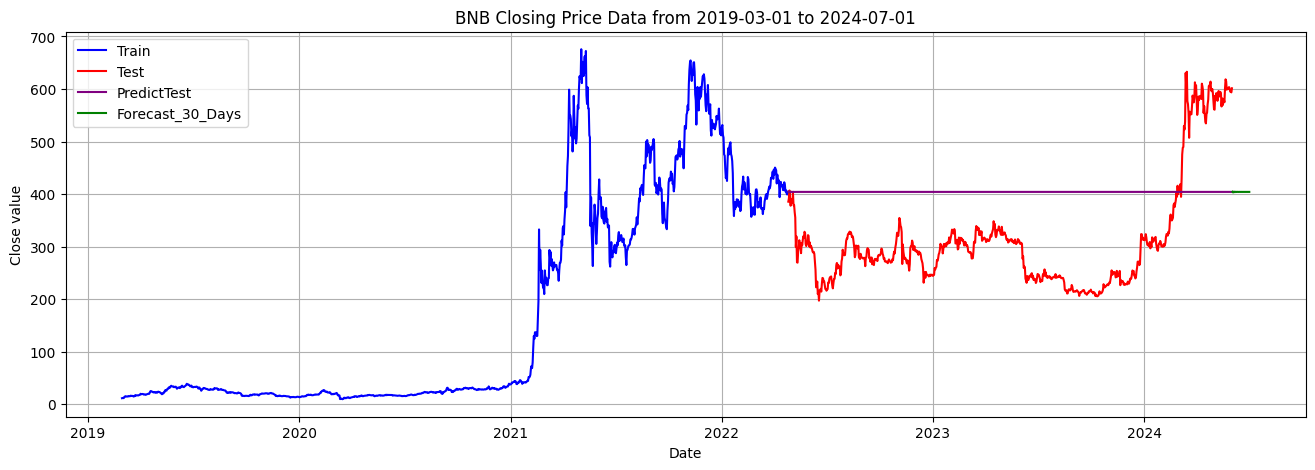

In [26]:
# Vẽ đồ thị cho dự đoán 30 ngày
plt.figure(figsize=(16, 5))
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='blue', linestyle='-', label='Train')
plt.plot(df.index[train_size:train_size + len(y_test)], y_test_inverse, color='red', linestyle='-', label='Test')
plt.plot(df.index[train_size:train_size + len(y_test)], y_pred_inverse, color='purple', linestyle='-', label='PredictTest')
plt.plot(index_next_30_days, forecast_30_days_inverse, color='green', linestyle='-', label='Forecast_30_Days')
plt.legend()
plt.grid()
plt.title(f"BNB Closing Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_30_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Close value")
plt.savefig('ARIMA_BNB_30days.png')
plt.show()

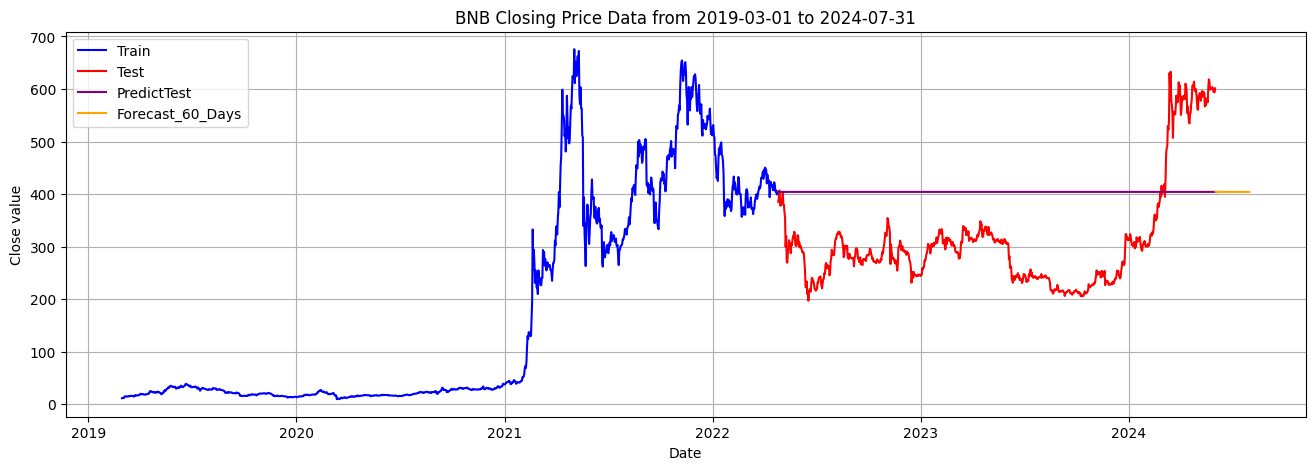

In [25]:
# Vẽ đồ thị cho dự đoán 60 ngày
plt.figure(figsize=(16, 5))
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='blue', linestyle='-', label='Train')
plt.plot(df.index[train_size:train_size + len(y_test)], y_test_inverse, color='red', linestyle='-', label='Test')
plt.plot(df.index[train_size:train_size + len(y_test)], y_pred_inverse, color='purple', linestyle='-', label='PredictTest')
plt.plot(index_next_60_days, forecast_60_days_inverse[:60], color='orange', linestyle='-', label='Forecast_60_Days')
plt.legend()
plt.grid()
plt.title(f"BNB Closing Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_60_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.savefig('ARIMA_BNB_60days.png')
plt.ylabel("Close value")
plt.show()


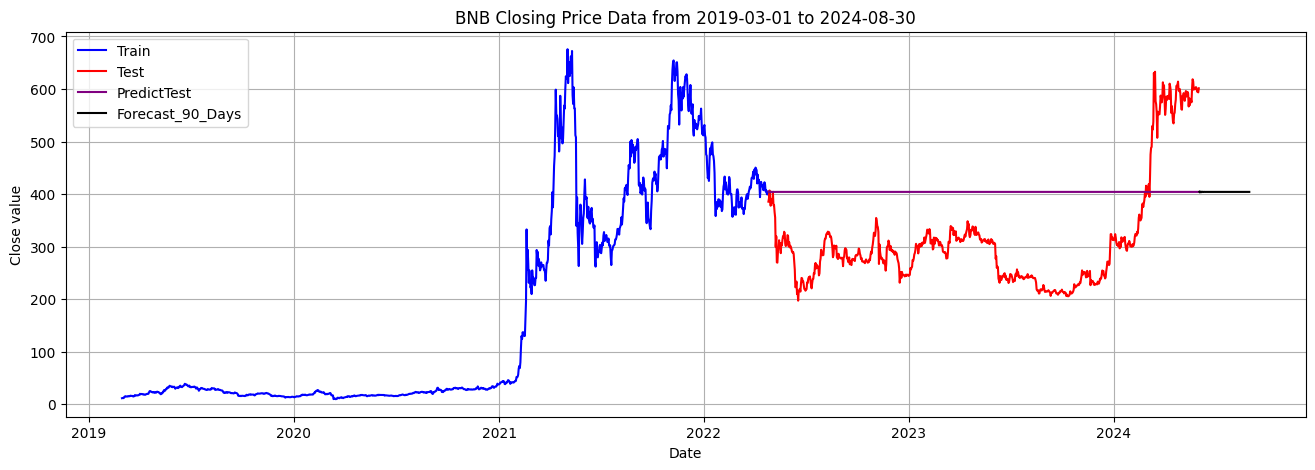

In [24]:
# Vẽ đồ thị cho dự đoán 90 ngày
plt.figure(figsize=(16, 5))
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='blue', linestyle='-', label='Train')
plt.plot(df.index[train_size:train_size + len(y_test)], y_test_inverse, color='red', linestyle='-', label='Test')
plt.plot(df.index[train_size:train_size + len(y_test)], y_pred_inverse, color='purple', linestyle='-', label='PredictTest')
plt.plot(index_next_90_days, forecast_90_days_inverse[:90], color='black', linestyle='-', label='Forecast_90_Days')
plt.legend()
plt.grid()
plt.title(f"BNB Closing Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_90_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Close value")
plt.savefig('ARIMA_BNB_90days.png')
plt.show()